In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [18]:
#load data from .dat files
d200 = pd.read_csv("in/pomiar200mA.dat", sep="\s+").rename(columns={"t[s]":"t", 'U[mV]':'U'})
d400 = pd.read_csv("in/pomiar400mA.dat", sep="\s+").rename(columns={"t[s]":"t", 'U[mV]':'U'})

In [70]:
#global constants
_figsize = (11,8)
_dotsize = 10
_linewidth = 1
_dpi = 350

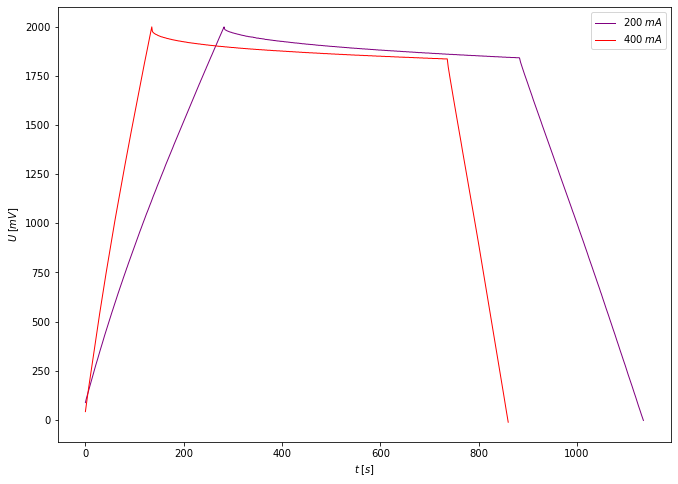

In [71]:

plt.figure(figsize=(11,8))

dotcolor = 'purple'
plt.plot(d200['t'], d200['U'], label=r'$200 \; mA$', color = dotcolor, linewidth = _linewidth)

dotcolor = 'red'
plt.plot(d400['t'], d400['U'], label=r'$400 \; mA$', color = dotcolor, linewidth = _linewidth)

plt.xlabel(r'$t \; [s]$')
plt.ylabel(r'$U \; [mV]$')

plt.legend()
plt.savefig('out/charakterystyka_200_i_400.jpg', dpi=_dpi)
plt.show()

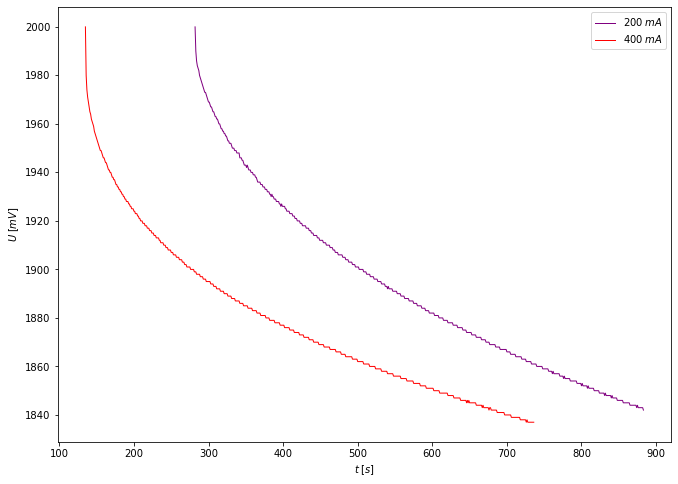

In [76]:

d200_short = d200[282:-252]
d400_short = d400[135:-124]
plt.figure(figsize=(11,8))

#plot 200 data
dotcolor = 'purple'
plt.plot(d200_short['t'], d200_short['U'], label=r'$200 \; mA$', color = dotcolor, linewidth=_linewidth)

x_fit_200 = np.arange(d200_short['t'].min(), d200_short['t'].max(), 1)

#plot 400 data
dotcolor = 'red'
plt.plot(d400_short['t'], d400_short['U'], label=r'$400 \; mA$', color = dotcolor, linewidth=_linewidth)

x_fit_400 = np.arange(d200_short['t'].min(), d200_short['t'].max(), 1)

plt.xlabel(r'$t \; [s]$')
plt.ylabel(r'$U \; [mV]$')

plt.legend()
plt.savefig('out/charakterystyka_200_i_400.jpg', dpi=_dpi)
plt.show()